In [64]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize

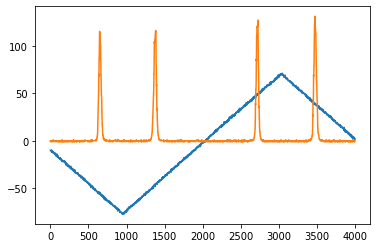

In [65]:
ramp0 = pd.read_csv("A0000CH1.CSV")
plt.plot(ramp0)
fabryperot = pd.read_csv("A0000CH2.CSV")
plt.plot(fabryperot)

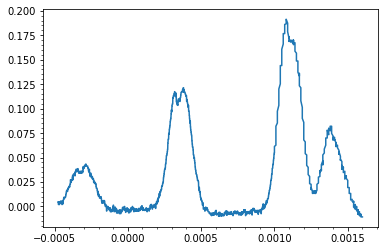

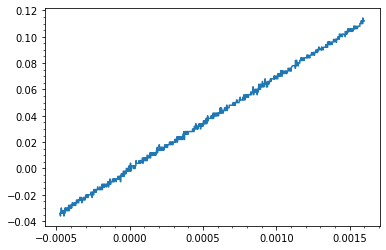

Pram(0): -0.0003087587057972757 +/- 1.4549229147201317e-06
Pram(1): 0.041456271563877226 +/- 0.0007197472161438613
Pram(2): 0.00010273593874507527 +/- 2.0898515596876686e-06
Pram(3): 0.00035737579422724387 +/- 4.6792259911923977e-07
Pram(4): 0.12521549385831943 +/- 0.0007350087612511509
Pram(5): 9.76329665293977e-05 +/- 6.617424823615033e-07
Pram(6): 0.0011034899738805854 +/- 3.119729707463157e-07
Pram(7): 0.1896900696967174 +/- 0.0007406858885544736
Pram(8): 9.734586837615638e-05 +/- 4.520514501786147e-07
Pram(9): 0.0013926666659754034 +/- 7.169250598041263e-07
Pram(10): 0.07780851258400669 +/- 0.0007848109890814667
Pram(11): 8.647194371809937e-05 +/- 1.0356100619385903e-06


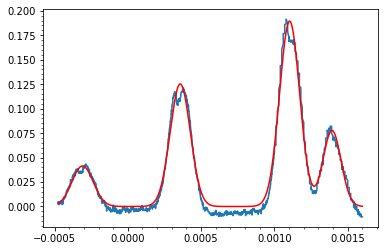

In [66]:
data =  pd.read_csv("A0001CH1.CSV")
data = np.array(data)
x,y = np.split(data, [-1], 1) # Divide into x and y for curve fitting
x.flatten() 
y.flatten()
x = np.hstack(x) # Fix stupid 2d array crap
y = np.hstack(y)

x = x[963:3036]
y = y[963:3036]
rampdata = pd.read_csv("A0001CH2.CSV")
rampdata = np.array(rampdata)
rampx, rampy = np.split(rampdata, [-1], 1)
rampx.flatten()
rampy.flatten()
rampx = np.hstack(rampx)
rampy = np.hstack(rampy)
rampx = rampx[963:3036]
rampy = rampy[963:3036]
y = y + 0.333333333*rampy + 0.01
plt.plot(x,y)
plt.minorticks_on()
plt.show()
plt.plot(rampx,rampy)
plt.minorticks_on()
plt.show()


def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

guess = [-0.00030, 0.05000, 0.00020, 0.00030, 0.15000, 0.00020, 0.00110, 0.21000, 0.00020, 0.00135, 0.08000, 0.00020]
# position, amplitude, width

popt, pcov = optimize.curve_fit(func, x, y, p0=guess, maxfev=100000)
#print(popt)
fit = func(x, *popt)
#chi2 = np.sum((y - fit)**2/y)
#print(chi2)

i = 0
while i < 12:
    print("Pram(" + str(i) + "): " + str(popt[i]) + " +/- " + str(np.sqrt(pcov[i,i])) )
    i += 1

plt.plot(x, y)
plt.plot(x, fit , 'r-')
plt.minorticks_on()
plt.show()

Y-error = (+/-) 0.0018415668650813705


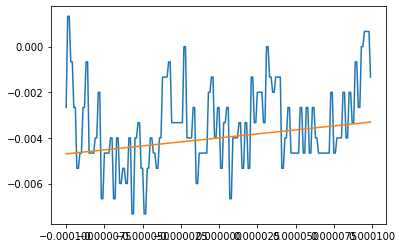

In [67]:
# Find flat '0' segments "manually"
# Here I'm taking from t=-0.0001 to t=0.0001
j = 0
for i in x: 
    if i == -0.0001:
        t1 = j
    if i == 0.0001:
        t2 = j
    j += 1
    
x_flat = x[t1:t2]
y_flat = y[t1:t2]

Back_guess = [7,-.004]

def linfunc(x_pts, a, b):
    return a * x_pts + b

Back_popt, Back_pcov = optimize.curve_fit(linfunc, x_flat, y_flat, Back_guess, maxfev=150000)

V_error = np.sqrt( sum( (y_flat - linfunc(x_flat, *Back_guess))**2 ) / (np.size(x_flat) - 2) )

print("Y-error = (+/-) " + str(V_error))


plt.plot(x_flat,y_flat)
plt.plot(x_flat, linfunc(x_flat, *Back_guess))
plt.show()

V_errorA = V_error * np.linspace(1,1,np.size(x))
    

Pram(0): -0.0003087587057986284 +/- 1.4549229149730375e-06
Pram(1): 0.041456271567129374 +/- 0.0007197472157184074
Pram(2): 0.00010273593872860715 +/- 2.0898515607657137e-06
Pram(3): 0.00035737579422860427 +/- 4.679225988761272e-07
Pram(4): 0.1252154938637696 +/- 0.0007350087617526364
Pram(5): 9.763296652344464e-05 +/- 6.617424825469327e-07
Pram(6): 0.0011034899738666826 +/- 3.119729705491294e-07
Pram(7): 0.18969006975903946 +/- 0.0007406858932267424
Pram(8): 9.734586831248162e-05 +/- 4.520514514843975e-07
Pram(9): 0.0013926666659647546 +/- 7.169250587278267e-07
Pram(10): 0.07780851249034139 +/- 0.0007848109879587765
Pram(11): 8.647194394025893e-05 +/- 1.035610051715048e-06

Reduced Chi Squared = 13.007365245883657


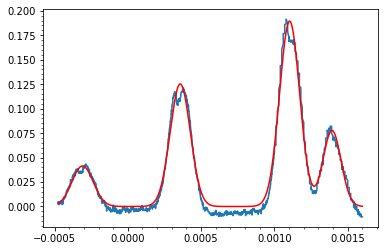

In [68]:
# Now that we have the y-error we can do another fit using that and find our chi-squared

# define functions for Chi squared
def ChiSqrd(Data, Fit, Error):
    return sum( (Data - Fit)**2 ) / (Error**2)

def RdChiSqrd(Data, Fit, Error, NumPrams):
    return sum( (Data - Fit)**2 ) / (Error**2 * (np.size(Data) - NumPrams - 2))



def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

guess = [-0.00030, 0.05000, 0.00020, 0.00030, 0.15000, 0.00020, 0.00110, 0.21000, 0.00020, 0.00135, 0.08000, 0.00020]
# position, amplitude, width

popt, pcov = optimize.curve_fit(func, x, y, p0=guess, sigma= V_errorA, maxfev=150000)
#print(popt)
fit = func(x, *popt)

i = 0
while i < 12:
    print("Pram(" + str(i) + "): " + str(popt[i]) + " +/- " + str(np.sqrt(pcov[i,i])) )
    i += 1
    
print("")
RCS = RdChiSqrd(y, func(x, *popt), V_error, 12)
print("Reduced Chi Squared = " + str(RCS))


plt.plot(x, y)
plt.plot(x, fit , 'r-')
plt.minorticks_on()
plt.show()

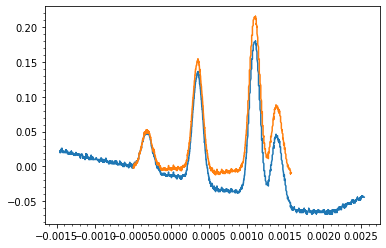

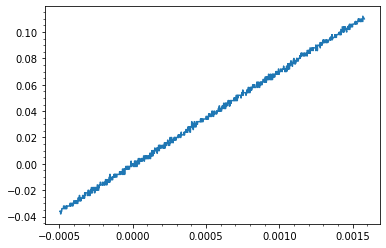

Y-error = (+/-) 0.0016216947220892288

Pram(0): -0.00031649965589272444 +/- 7.783410764536553e-07
Pram(1): 0.05204280110971164 +/- 0.000536939126215933
Pram(2): 9.243332924752745e-05 +/- 1.1038353248579268e-06
Pram(3): 0.00034992633568441367 +/- 2.5888731773699306e-07
Pram(4): 0.153191283010829 +/- 0.0005477301255471967
Pram(5): 8.867962128248772e-05 +/- 3.661219556767849e-07
Pram(6): 0.00109996665584301 +/- 1.8483801348797187e-07
Pram(7): 0.2189953469837204 +/- 0.0005419791785171465
Pram(8): 9.122115995672953e-05 +/- 2.650618044631444e-07
Pram(9): 0.001393092575255616 +/- 4.429096103492902e-07
Pram(10): 0.08874795820651075 +/- 0.0005575675493221338
Pram(11): 8.617383467799723e-05 +/- 6.351468715743078e-07

Reduced Chi Squared = 8.460756743326659


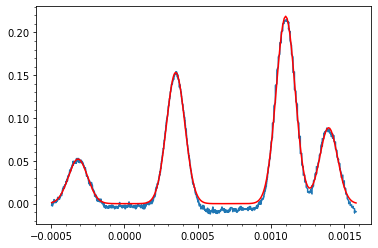

In [71]:
data =  pd.read_csv("A0005CH1.CSV")
data = np.array(data)
x,y = np.split(data, [-1], 1) # Divide into x and y for curve fitting
x.flatten() 
y.flatten()
x = np.hstack(x) # Fix stupid 2d array crap
y = np.hstack(y)

x = x[963:3036]
y = y[963:3036]
rampdata = pd.read_csv("A0005CH2.CSV")
rampdata = np.array(rampdata)
rampx, rampy = np.split(rampdata, [-1], 1)
rampx.flatten()
rampy.flatten()
rampx = np.hstack(rampx)
rampy = np.hstack(rampy)
rampx = rampx[963:3036]
rampy = rampy[963:3036]
y = y + 0.333333333*rampy + 0.01
plt.plot(x,y)
plt.minorticks_on()
plt.show()
plt.plot(rampx,rampy)
plt.minorticks_on()
plt.show()

def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

guess = [-0.00030, 0.05000, 0.00020, 0.00030, 0.15000, 0.00020, 0.00110, 0.21000, 0.00020, 0.00135, 0.08000, 0.00020]
# position, amplitude, width

################################################ Y Error Analisis
# Find flat '0' segments "manually"
# Automaticly cuts out the portion from t=-0.0001 to t=0.0001
j = 0
for i in x: 
    if i == -0.0001:
        t1 = j
    if i == 0.0001:
        t2 = j
    j += 1
    
x_flat = x[t1:t2]
y_flat = y[t1:t2]

Back_guess = [7,-.004]

def linfunc(x_pts, a, b):
    return a * x_pts + b

Back_popt, Back_pcov = optimize.curve_fit(linfunc, x_flat, y_flat, Back_guess, maxfev=150000)

V_error = np.sqrt( sum( (y_flat - linfunc(x_flat, *Back_guess))**2 ) / (np.size(x_flat) - 2) )

print("Y-error = (+/-) " + str(V_error))
print("")

V_errorA = V_error * np.linspace(1,1,np.size(x))

#plt.plot(x_flat,y_flat)
#plt.plot(x_flat, linfunc(x_flat, *Back_guess))
#plt.show()

################################################



popt, pcov = optimize.curve_fit(func, x, y, p0=guess, sigma= V_errorA, maxfev=10000)
#print(popt)
fit = func(x, *popt)
#chi2 = np.sum((y - fit)**2/y)
#print(chi2)

i = 0
while i < 12:
    print("Pram(" + str(i) + "): " + str(popt[i]) + " +/- " + str(np.sqrt(pcov[i,i])) )
    i += 1
    
print("")
RCS = RdChiSqrd(y, func(x, *popt), V_error, 12)
print("Reduced Chi Squared = " + str(RCS))

plt.plot(x, y)
plt.plot(x, fit , 'r-')
plt.minorticks_on()
plt.show()

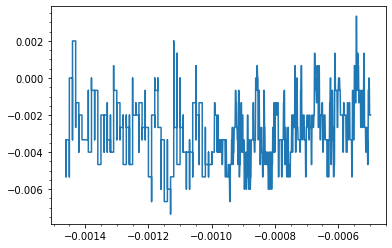

In [70]:
data =  pd.read_csv("A0005CH1.CSV")
data = np.array(data)
x,y = np.split(data, [-1], 1) # Divide into x and y for curve fitting
x.flatten() 
y.flatten()
x = np.hstack(x) # Fix stupid 2d array crap
y = np.hstack(y)
x = x[0:962]
y = y[0:962]
rampdata = pd.read_csv("A0005CH2.CSV")
rampdata = np.array(rampdata)
rampx, rampy = np.split(rampdata, [-1], 1)
rampx.flatten()
rampy.flatten()
rampx = np.hstack(rampx)
rampy = np.hstack(rampy)
rampx = rampx[0:962]
rampy = rampy[0:962]
y = y + 0.333333333*rampy + 0.01
plt.plot(x, y)
plt.minorticks_on()
plt.show()
